In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn


drive.mount('/content/drive')
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/EEG_Confused_Student/EEG_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/datasets/EMG-data.csv
/content/drive/MyDrive/Colab Notebooks/datasets/EEG_Confused_Student/demographic_info.csv
/content/drive/MyDrive/Colab Notebooks/datasets/EEG_Confused_Student/EEG_data.csv
/content/drive/MyDrive/Colab Notebooks/datasets/EEG_Confused_Student/videos/4.m4v
/content/drive/MyDrive/Colab Notebooks/datasets/EEG_Confused_Student/videos/3.m4v
/content/drive/MyDrive/Colab Notebooks/datasets/EEG_Confused_Student/videos/0.m4v
/content/drive/MyDrive/Colab Notebooks/datasets/EEG_Confused_Student/videos/6.m4v
/content/drive/MyDrive/Colab Notebooks/datasets/EEG_Confused_Student/videos/2.m4v
/content/drive/MyDrive/Colab Notebooks/datasets/EEG_Confused_Student/videos/1.m4v
/content/drive/MyDrive/Colab Notebooks/datasets/EEG_Confused_Student/videos/5.m4v
/content/drive/MyDrive/Colab Notebooks/datasets/EEG_Confused_Stu

In [ ]:
data.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12811 entries, 0 to 12810
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  float64
 1   VideoID             12811 non-null  float64
 2   Attention           12811 non-null  float64
 3   Mediation           12811 non-null  float64
 4   Raw                 12811 non-null  float64
 5   Delta               12811 non-null  float64
 6   Theta               12811 non-null  float64
 7   Alpha1              12811 non-null  float64
 8   Alpha2              12811 non-null  float64
 9   Beta1               12811 non-null  float64
 10  Beta2               12811 non-null  float64
 11  Gamma1              12811 non-null  float64
 12  Gamma2              12811 non-null  float64
 13  predefinedlabel     12811 non-null  float64
 14  user-definedlabeln  12811 non-null  float64
dtypes: float64(15)
memory usage: 1.5 MB


In [ ]:
demo_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/EEG_Confused_Student/demographic_info.csv')

## Renaming columns for easy merging
demo_df = demo_df.rename(columns = {'subject ID': 'SubjectID'})
data = data.merge(demo_df,how = 'inner',on = 'SubjectID')
data = pd.get_dummies(data)
data.head()


,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,...,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity_Bengali,ethnicity_English,ethnicity_Han Chinese,gender_F,gender_M
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,...,33228.0,8293.0,0.0,0.0,25,0,0,1,0,1
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,...,5293.0,2740.0,0.0,0.0,25,0,0,1,0,1
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,...,57243.0,25354.0,0.0,0.0,25,0,0,1,0,1
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,...,49960.0,33932.0,0.0,0.0,25,0,0,1,0,1
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,...,44790.0,29749.0,0.0,0.0,25,0,0,1,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12811 entries, 0 to 12810
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SubjectID               12811 non-null  float64
 1   VideoID                 12811 non-null  float64
 2   Attention               12811 non-null  float64
 3   Mediation               12811 non-null  float64
 4   Raw                     12811 non-null  float64
 5   Delta                   12811 non-null  float64
 6   Theta                   12811 non-null  float64
 7   Alpha1                  12811 non-null  float64
 8   Alpha2                  12811 non-null  float64
 9   Beta1                   12811 non-null  float64
 10  Beta2                   12811 non-null  float64
 11  Gamma1                  12811 non-null  float64
 12  Gamma2                  12811 non-null  float64
 13  predefinedlabel         12811 non-null  float64
 14  user-definedlabeln      12811 non-null

In [ ]:
print(data.columns)

Index(['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
       'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
       'predefinedlabel', 'user-definedlabeln', ' age', ' ethnicity_Bengali',
       ' ethnicity_English', ' ethnicity_Han Chinese', ' gender_F',
       ' gender_M'],
      dtype='object')


In [ ]:
## Missing value check
print("Missing values count : " + str(data.isna().sum().sum()))

Missing values count : 0


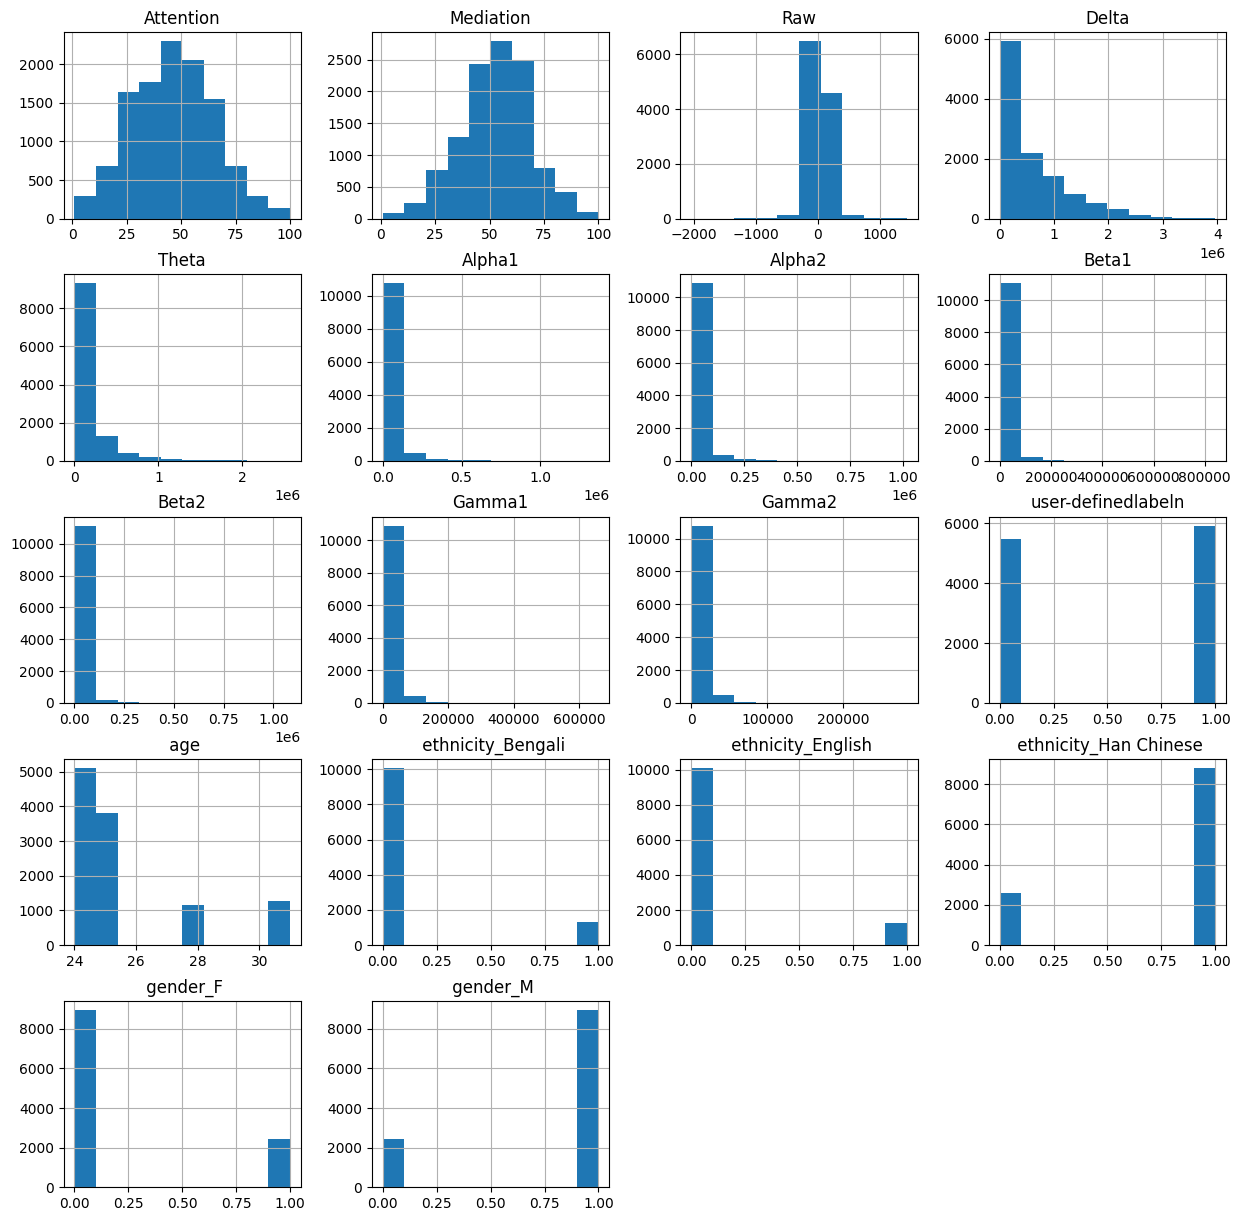

In [ ]:
data.drop(['SubjectID','VideoID','predefinedlabel'],axis = 1,inplace=True)
data = data[data['Attention']> 0.0]
data.shape
data.hist(figsize = (15,15))
plt.show()

In [ ]:
data.shape

(11388, 18)

<Axes: >

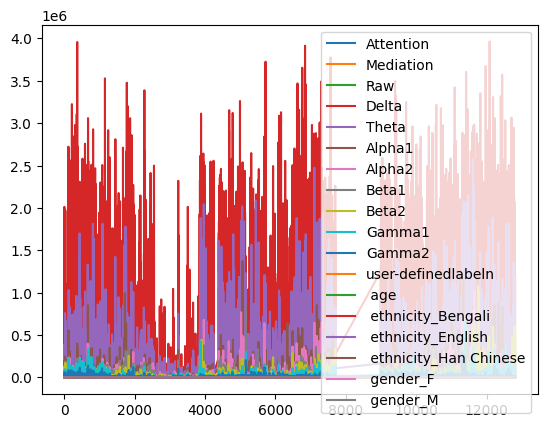

In [ ]:
data.plot()

<Axes: >

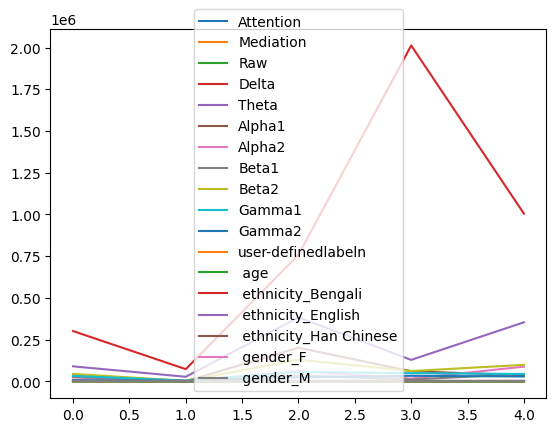

In [ ]:
data.head().plot()

In [ ]:
data.describe()

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln,age,ethnicity_Bengali,ethnicity_English,ethnicity_Han Chinese,gender_F,gender_M
count,11388.000000,11388.000000,11388.00000,1.138800e+04,1.138800e+04,1.138800e+04,1.138800e+04,11388.000000,1.138800e+04,11388.000000,11388.000000,11388.000000,11388.000000,11388.000000,11388.000000,11388.000000,11388.000000,11388.000000
mean,46.476291,53.078416,34.17536,5.889327e+05,1.591795e+05,3.852306e+04,2.821509e+04,20329.359765,2.428331e+04,16961.018967,8290.940815,0.520285,25.535388,0.113716,0.112750,0.773534,0.213295,0.786705
std,19.055125,16.262623,131.54625,6.349825e+05,2.366584e+05,6.765903e+04,4.852980e+04,29238.128571,3.625479e+04,25818.354575,11584.407767,0.499610,2.268658,0.317480,0.316301,0.418563,0.409652,0.409652
min,1.000000,1.000000,-2048.00000,4.480000e+02,1.700000e+01,2.000000e+00,2.000000e+00,3.000000,2.000000e+00,1.000000,2.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,43.000000,-10.00000,8.952275e+04,2.426200e+04,6.671000e+03,6.531250e+03,5727.500000,6.925750e+03,3795.750000,2013.000000,0.000000,24.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,47.000000,53.000000,34.00000,3.684005e+05,7.383450e+04,1.650800e+04,1.389850e+04,11657.000000,1.403700e+04,8611.000000,4551.000000,1.000000,25.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,60.000000,64.000000,80.00000,8.915008e+05,1.907732e+05,4.120700e+04,3.046125e+04,24057.500000,2.902300e+04,19298.500000,9920.500000,1.000000,25.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,100.000000,100.000000,1440.00000,3.964663e+06,2.567643e+06,1.369955e+06,1.016913e+06,840994.000000,1.083461e+06,658008.000000,283517.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df=pd.DataFrame(data)

In [ ]:
df.columns

Index(['Attention', 'Mediation', 'Raw', 'Delta', 'Theta', 'Alpha1', 'Alpha2',
       'Beta1', 'Beta2', 'Gamma1', 'Gamma2', 'user-definedlabeln', ' age',
       ' ethnicity_Bengali', ' ethnicity_English', ' ethnicity_Han Chinese',
       ' gender_F', ' gender_M'],
      dtype='object')

In [ ]:
print(data['user-definedlabeln'].unique())

[0. 1.]


<Axes: >

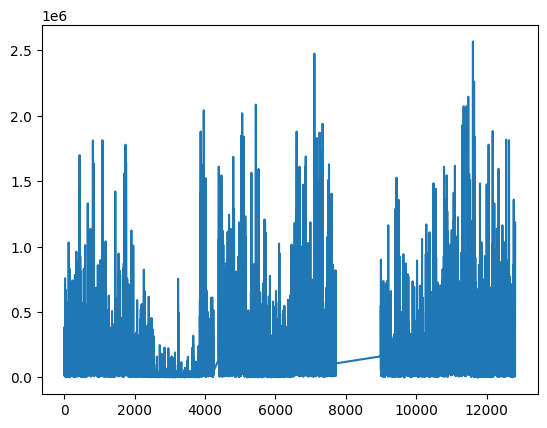

In [ ]:
df['Theta'].plot()

Theta
17.0         1.0
25.0         1.0
121.0        1.0
694.0        0.0
1068.0       1.0
            ... 
2145547.0    1.0
2246933.0    0.0
2260305.0    1.0
2474642.0    0.0
2567643.0    1.0
Name: user-definedlabeln, Length: 10700, dtype: float64
       user-definedlabeln
count        10700.000000
mean             0.505460
std              0.496955
min              0.000000
25%              0.000000
50%              0.583333
75%              1.000000
max              1.000000


<Axes: xlabel='Theta'>

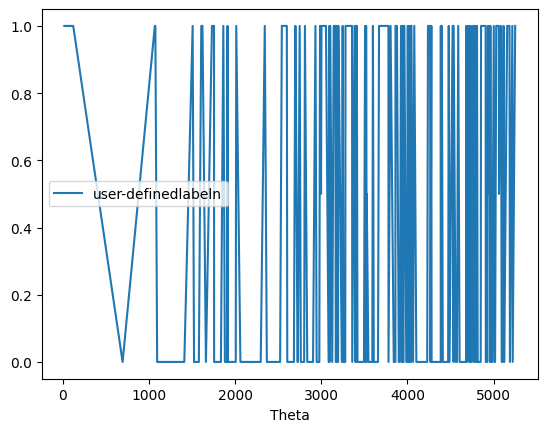

In [ ]:
gr1=df.groupby('Theta')['user-definedlabeln'].mean()
print(gr1)
grp1=pd.DataFrame(gr1)
print(grp1.describe())
grp1.head(300).plot()


Alpha1
2.0          1.0
3.0          1.0
25.0         1.0
73.0         1.0
75.0         0.0
            ... 
853451.0     1.0
878352.0     0.0
992457.0     1.0
1143171.0    1.0
1369955.0    1.0
Name: user-definedlabeln, Length: 9937, dtype: float64
       user-definedlabeln
count         9937.000000
mean             0.509091
std              0.487654
min              0.000000
25%              0.000000
50%              0.500000
75%              1.000000
max              1.000000


<Axes: xlabel='Alpha1'>

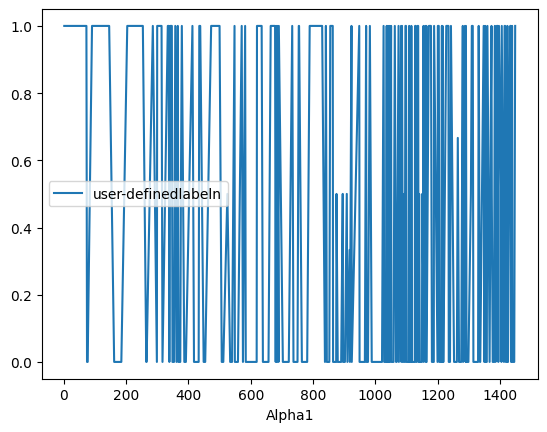

In [ ]:
gr2=df.groupby('Alpha1')['user-definedlabeln'].mean()
print(gr2)
grp2=pd.DataFrame(gr2)
print(grp2.describe())
grp2.head(300).plot()

Alpha2
2.0          1.0
10.0         1.0
167.0        1.0
200.0        1.0
205.0        1.0
            ... 
722970.0     1.0
769206.0     1.0
786017.0     1.0
812503.0     1.0
1016913.0    1.0
Name: user-definedlabeln, Length: 9699, dtype: float64
       user-definedlabeln
count         9699.000000
mean             0.508941
std              0.483998
min              0.000000
25%              0.000000
50%              0.500000
75%              1.000000
max              1.000000


<Axes: xlabel='Alpha2'>

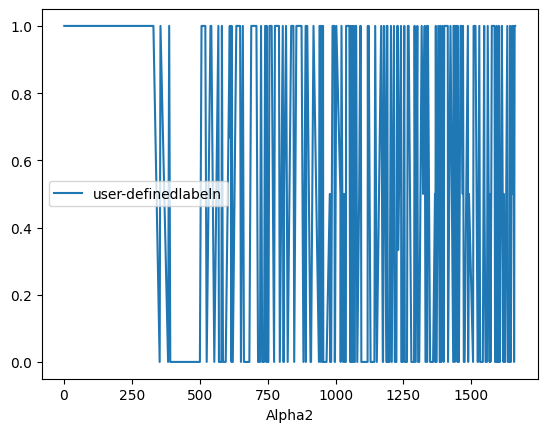

In [ ]:
gr3=df.groupby('Alpha2')['user-definedlabeln'].mean()
print(gr3)
grp3=pd.DataFrame(gr3)
print(grp3.describe())
grp3.head(300).plot()

<Axes: >

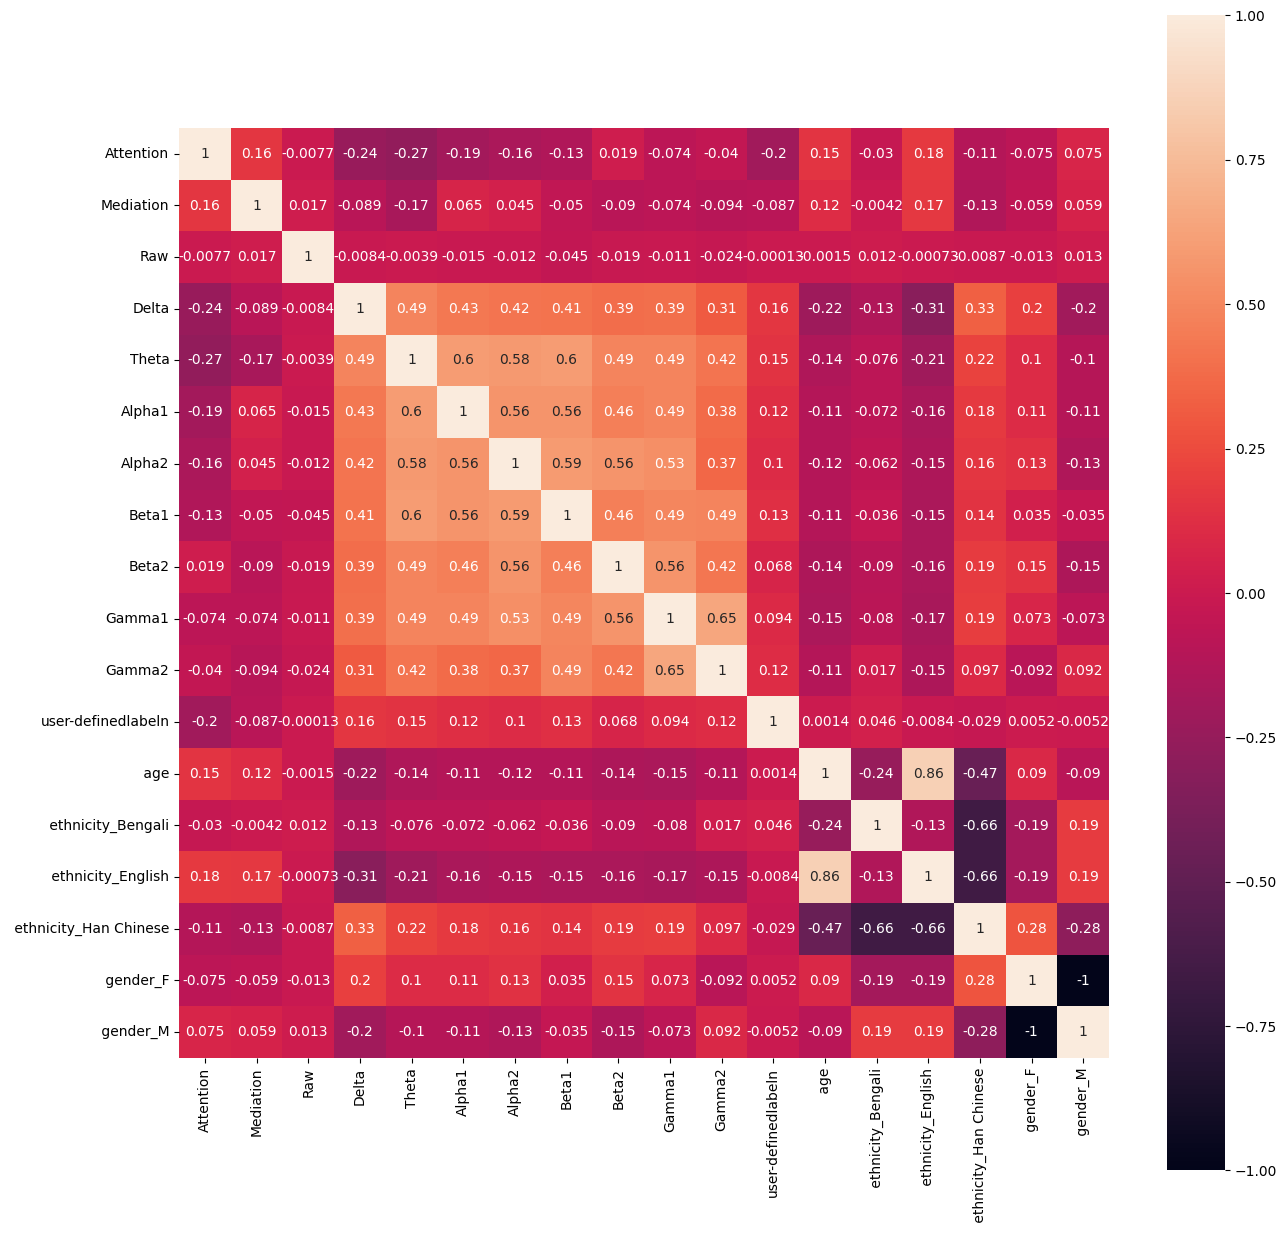

In [ ]:
plt.figure(figsize = (15,15))
corr_matrix = df.corr()
seaborn.heatmap(corr_matrix,vmin = -1.0, square=True, annot = True)

In [ ]:
###testing the acuuracy for the first timw will do the other preprocessing later ones the accuracy is seen
X_int=df.drop('user-definedlabeln',axis=1).values
Y_int=df['user-definedlabeln'].values


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_int,Y_int, test_size=0.2,random_state=42)

In [ ]:
print(X_train)

[[  50.   41.    1. ...    1.    0.    1.]
 [  11.   53.   70. ...    1.    1.    0.]
 [  30.   48.   85. ...    1.    1.    0.]
 ...
 [  53.   75. -502. ...    0.    0.    1.]
 [  44.   51.  112. ...    1.    0.    1.]
 [  84.   57.  139. ...    1.    0.    1.]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
for i in range(1,50):
    clf=RandomForestClassifier(n_estimators=i,max_depth=2,random_state=13)
    clf.fit(X_train,y_train)
    clf.predict(X_test)
    scr=clf.score(X_test,y_test)
    print(scr)


0.6005267778753293
0.5891132572431957
0.5930640913081651
0.5908691834942933
0.5943810359964882
0.602721685689201
0.6150131694468832
0.6044776119402985
0.6049165935030729
0.5974539069359087
0.6018437225636524
0.6049165935030729
0.6018437225636524
0.6005267778753293
0.6057945566286216
0.6018437225636524
0.6049165935030729
0.6044776119402985
0.6035996488147498
0.6066725197541704
0.607550482879719
0.607550482879719
0.6071115013169447
0.6106233538191396
0.6141352063213346
0.6101843722563652
0.612379280070237
0.6093064091308165
0.607550482879719
0.607550482879719
0.6101843722563652
0.6101843722563652
0.6106233538191396
0.611062335381914
0.6119402985074627
0.6145741878841089
0.6115013169446883
0.6106233538191396
0.6084284460052678
0.6097453906935909
0.6066725197541704
0.6101843722563652
0.6106233538191396
0.6101843722563652
0.6115013169446883
0.6115013169446883
0.6088674275680421
0.6079894644424935
0.6079894644424935


In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train,y_train)
preds = clf.predict(X_test)
clf.score(X_test, y_test)


0.5987708516242318

In [ ]:
!pip install xgboost


In [ ]:
import xgboost as xgb

xg = xgb.XGBClassifier(objective='binary:logistic', n_estimators=1000, seed=1)
xg.fit(X_train,y_train)
print(xg.predict(X_test))
xg.score(X_test,y_test)


[0 1 1 ... 1 1 1]


0.6821773485513608

In [ ]:
import xgboost as xgb

xg = xgb.XGBClassifier(objective='binary:logistic', n_estimators=1,seed=1)
xg.fit(X_train,y_train)
predict=xg.predict(X_test)
print(xg.score(X_test,y_test))

0.6492537313432836


In [ ]:
import xgboost as xgb
for i in range(200,210):
    xg = xgb.XGBClassifier(objective='binary:logistic', n_estimators=i, seed=1)
    xg.fit(X_train,y_train)
    predict=xg.predict(X_test)
    print(xg.score(X_test,y_test))

0.6760316066725197
0.6755926251097454
0.6773485513608428
0.6769095697980685
0.6782265144863916
0.6782265144863916
0.675153643546971
0.675153643546971
0.6747146619841967
0.6733977172958736


In [ ]:
# final accuracy

import xgboost as xgb

xg = xgb.XGBClassifier(objective='binary:logistic', n_estimators=3000, seed=1)
xg.fit(X_train,y_train)
print(xg.predict(X_test))
xg.score(X_test,y_test)

[0 1 1 ... 1 1 1]


0.6716417910447762

After preprocessing the dataset properly for unnecessary features, we will use the XGB Classifier to the fit and predict.